Causal Inference as a missing data problem: $Y(1),Y(0)$ are primitive potential outcome random variables and $T$ is the binary treatment and $Y$ is the continous observed outcome. Then we are interested in $E[Y(1)-Y(0)]$. We consider the simple difference in observed means, $\hat{\tau} = \bar{Y}_1 -  \bar{Y}_0$, where $\bar{Y}_1 = 1/n_1 \sum_i Y_i T_i$ and $\bar{Y}_0 = 1/n_0 \sum_i Y_i (1-T_i)$. Note, $n_0,n_1$ are the number untreated and treated respectively. Then we see that, if $P[T=1]>0,

$$\hat{\tau} \rightarrow_p E[Y|T=1]-E[Y|T=0]$$

The central question is when is when is $E[Y|T=1]-E[Y|T=0]$ equal to $E[Y(1)-Y(0)]$.

 - Positivity $P[T=1]>0$: every individual must have non-zero probability of being given the treatment. Nobody in the population considered should be prima facie disbarred from recieving the treatment. This can be violated, when say all the users in a drug trial above the age of 60 were disbarred from the treatment. Now, positivity only holds for people below the age of 60.
 - SUTVA (Stable Unit Treatment Value Assumption): This means two things,
    - Non-interference/No spillover of treatment: Individual A's treatment must never effect Individual B's observed outcome. This can violated when a vaccine intervention in a treatment group in individual A begins to prevent the spread of the disease in general, effecting observed outcomes of others. This can also be violated when a job training program where treatment was given to an entire school. Better learning outcomes in student A also helped student B as they studied in a common study group. Another example is fertilizer RCT where the barriers in the soil were weak and treatments in one box spilled over to the other box.
    - Stable treatment: Treatment did not have hidden versions that were rolled out to different units. Treatment was well defined and its different values known. This can be violated when in a drug RCT the treatment actually has three values (unknown to researchers), and this leads to different users in the treatment group actually getting access to two treatments rather than one.

Consequence of SUTVA is: $Y_i = T_i Y_i(1) + (1-T_i) Y_i(0)$. Note, that unit i's outcome does not depend on unit j's treatment or potential outcomes, as if they lived boxed off from each other. Note, that the observed outcome does not depend on a third treatment value or anything else outside the system. $Y_i(1), Y_i(0)$ summarize everything one needs to know about the individual pre-treatment. With SUTVA we get,

$$\hat{\tau} \rightarrow_p E[Y|T=1]-E[Y|T=0] = E[Y(1)|T=1]-E[Y(0)|T=0]$$

If we randomized the treatment we have $Y(1),Y(0) \perp T$. Or, nothing about the user's potential, $Y(1),Y(0)$ could influence their getting the treatment. This is easily violated, when in a RCT we see that people with a very high $Y(1)-Y(0)$, or those who seek to gain most from the treatment, get the treatment.


In [79]:
import numpy as np
import matplotlib.pyplot as plt

# data
N = 100
Y_0 = np.random.normal(1,0.2,N)
Y_1 = np.random.normal(2,0.2,N)
ATE = 1

nan


In [4]:
np.c_[Y_0, Y_1][0:5]

array([[1.16005165, 2.21010556],
       [0.99664001, 2.22388643],
       [1.28221436, 2.13472818],
       [0.9593178 , 2.18170329],
       [1.2825125 , 1.79438279]])

Positivity Violation
- if $P(T==1)=0$ then estimator undefined
- even small $P(T==1)>0$ allows estimation if data is large
- Note, that a smaller $P(T==1)>0$ will increase the variance, thus if the treatment is rarely administered one needs much more data to be able to get to the true impact of the treatment.

In [5]:
T = np.random.binomial(1,0,N)
Y = T * Y_1 + (1-T)*Y_0
tau_hat = np.mean(Y[T==1]) - np.mean(Y[T==0])
print(tau_hat)

nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


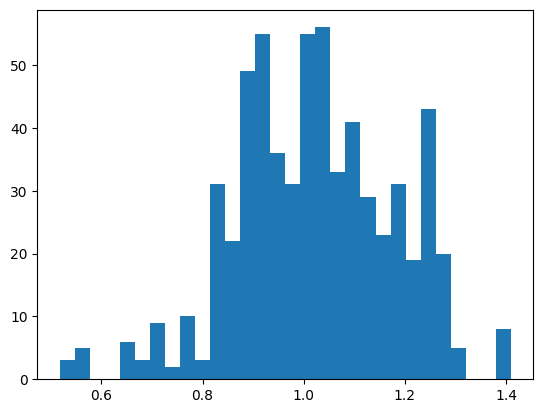

In [8]:
tau_hats = []
for k in range(1000):
    T = np.random.binomial(1,0.01,N)
    Y = T * Y_1 + (1-T)*Y_0
    tau_hat = np.mean(Y[T==1]) - np.mean(Y[T==0])
    tau_hats.append(tau_hat)
plt.hist(tau_hats, bins = 30)
plt.show()

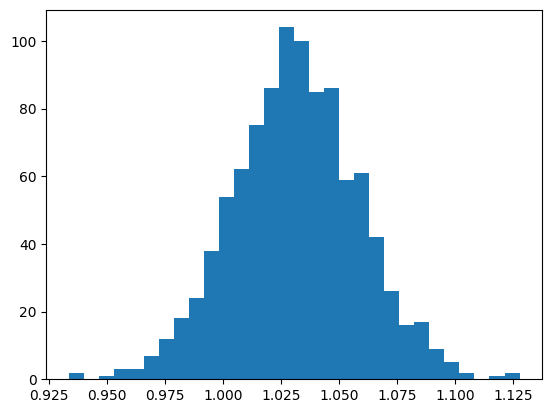

In [9]:
tau_hats = []
for k in range(1000):
    T = np.random.binomial(1,0.5,N)
    Y = T * Y_1 + (1-T)*Y_0
    tau_hat = np.mean(Y[T==1]) - np.mean(Y[T==0])
    tau_hats.append(tau_hat)
plt.hist(tau_hats, bins = 30)
plt.show()

SUTVA Violation - Interference
- One type of interference is network interference, where each persons treatment effects all the others. Under such interference, the difference-in-means estimator is inconsistent.


[[ 1.   -0.   -0.1  ... -0.15 -0.14 -0.18]
 [-0.04  1.   -0.09 ... -0.2  -0.03 -0.09]
 [-0.16 -0.15  1.   ... -0.2  -0.18 -0.14]
 ...
 [-0.11 -0.04 -0.13 ...  1.   -0.18 -0.16]
 [-0.04 -0.07 -0.04 ... -0.12  1.   -0.03]
 [-0.12 -0.07 -0.06 ... -0.03 -0.06  1.  ]]


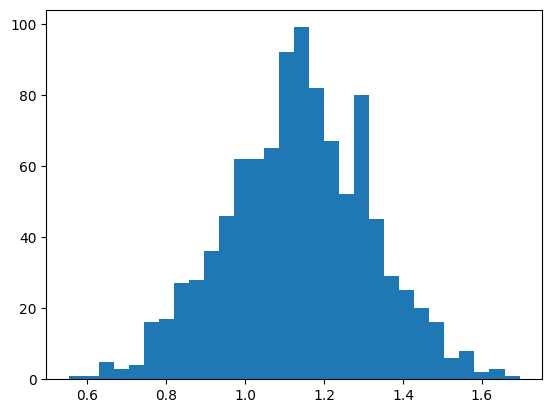

In [11]:
Omega = np.random.uniform(-1,0,(N,N)) * 0.2 # spillover network weights
np.fill_diagonal(Omega,1)
print(np.round(Omega,2))
tau_hats = []
for k in range(1000):
    T = np.random.binomial(1,0.5,N)
    Y = np.dot(Omega, T * Y_1 + (1-T) * Y_0)
    tau_hat = np.mean(Y[T==1]) - np.mean(Y[T==0])
    tau_hats.append(tau_hat)
plt.hist(tau_hats, bins = 30)
plt.show()

SUTVA Violation - Unstable Treatment
- If the treatment has more values possible than known and if their potential outcomes have significantly different impact then inference fails.

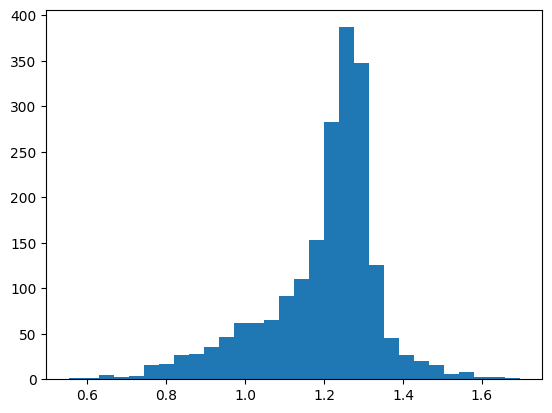

In [12]:
Y_2 = np.random.normal(2.5,0.2,N) # third potential outcome
for k in range(1000):
    T = np.random.choice([0,1,2],N)
    Y = Y_0 * [T==0] + Y_1 * [T==1] + Y_2 * [T==2] # true treatment has 3 values
    Y = Y.flatten()
    T = np.where(T==0, 0, 1) # T == 2 treatment is treated as T == 1.
    tau_hat = np.mean(Y[T==1]) - np.mean(Y[T==0])
    tau_hats.append(tau_hat)
plt.hist(tau_hats, bins = 30)
plt.show()

Randomization Violation

- If the treatment is assigned based on the potential outcome values themselves, then we see bias. For instance, if $X$ is ability and $Y_1, Y_0$ are the potential outcomes from education $T$, then we let us have,

$$Y_1 = X$$
$$Y_0 = 0$$
$$Y_1 - Y_0 = X$$
$$\tau = E[Y_1 - Y_0] = E[X]$$

Now ability also determines if education is undertaken, where $\alpha, \beta$ governs the base and incremental prob of recieving treatment,

$$X \sim BER(0.5)$$
$$T \sim BER(\alpha+\beta X)$$
$$E[T|X] = \alpha+\beta X $$

$$Y = T Y_1 + (1-T)Y_0 = T X$$
$$E[Y|X] = (\alpha+\beta X) X = \alpha X+\beta X^2$$

Since those who benefit from treatment most also seek treatment. If we simply compare the means and if $\beta>0$ we will end up overestimating the benefit of the treatment.

0.46195652173913043


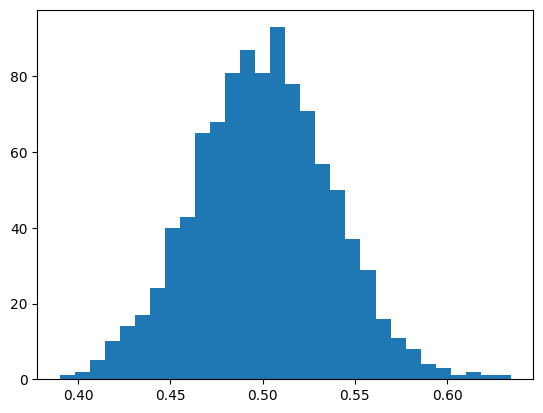

In [76]:
tau_hats = []

alpha = 0.2
beta = 0.5 # selection
#beta = 0 # no selection
N = 1000

for k in range(1000):
    X = np.random.binomial(1,0.5,N)
    Y_1 = X
    Y_0 = 0
    T = np.random.binomial(1, alpha + beta * X, N)
    Y = T * Y_1 + (1-T)*Y_0
    tau_hat = np.mean(Y[T==1]) - np.mean(Y[T==0])
    tau_hats.append(tau_hat)
print(np.mean(tau_hat))
plt.hist(tau_hats, bins = 30)
plt.show()